In [16]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
%matplotlib inline

from collections import Counter
import featuretools as ft 

import itertools
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
# from mlxtend.plotting import plot_learning_curves
# from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA

import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

# 数据分析部分

In [2]:
#训练集
train_data = pd.read_csv('used_car_train_20200313.csv',sep =  ' ' )
print(train_data.shape)
train_data.describe()

(150000, 31)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [95]:
#测试集
test_data = pd.read_csv('used_car_testA_20200313.csv',sep = ' ')
print(test_data.shape)
test_data.describe()

(50000, 30)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,...,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,...,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,...,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,...,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


In [4]:
#查看缺失值
train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [5]:
test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

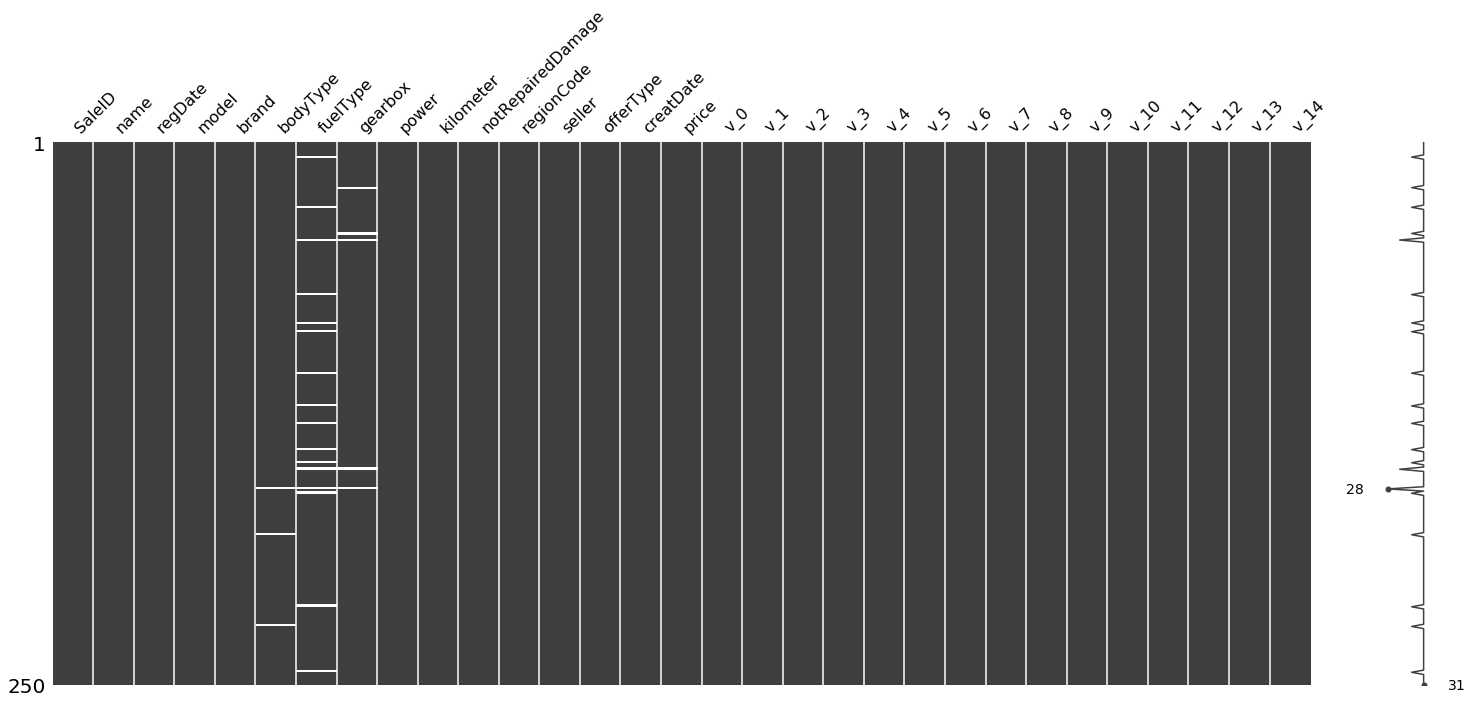

In [6]:
#缺省值
msno.matrix(train_data.sample(250))

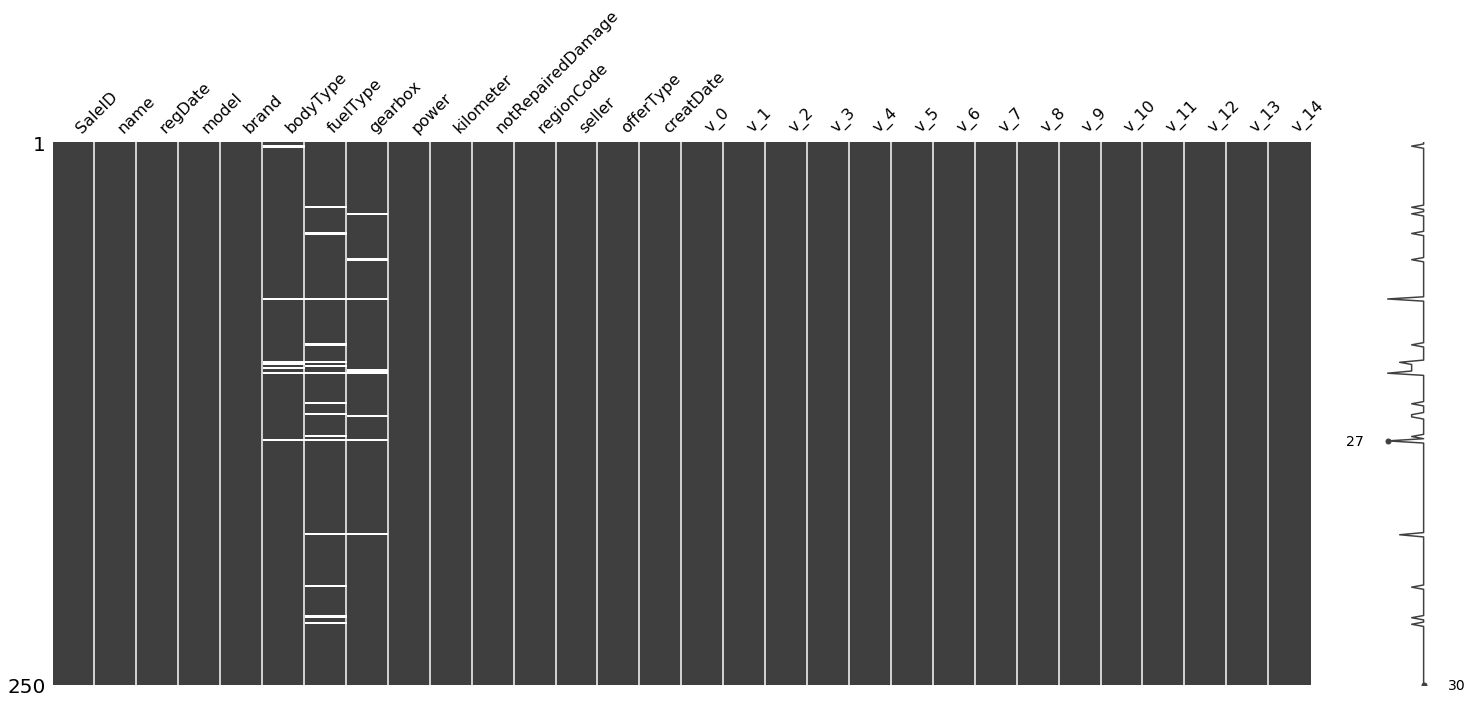

In [7]:
#缺省值
msno.matrix(test_data.sample(250))

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [9]:
#发现object列有-,替换
train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [10]:
train_data['notRepairedDamage'].replace('-',np.nan,inplace = True)
train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [11]:
test_data['notRepairedDamage'].replace('-',np.nan,inplace = True)
test_data['notRepairedDamage'].value_counts()

0.0    37249
1.0     4720
Name: notRepairedDamage, dtype: int64

In [12]:
train_data['seller'].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [13]:
train_data['offerType'].value_counts()

0    150000
Name: offerType, dtype: int64

In [14]:
#seller 和 offerType 数据严重倾斜，删除
del train_data['seller']
del train_data['offerType']
del test_data['seller']
del test_data['offerType']

Skewness: 3.346487
Kurtosis: 18.995183


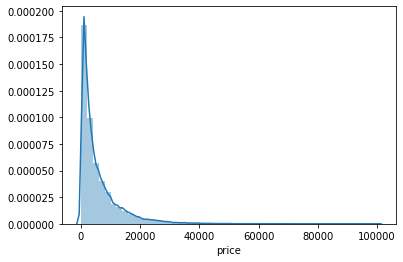

In [15]:
#观察因变量
sns.distplot(train_data.price)
print("Skewness: %f" % train_data['price'].skew())
print("Kurtosis: %f" % train_data['price'].kurt())
Y_train = train_data.price

# 特征工程

## 数据一：手动特征数据处理

In [16]:
#处理异常值程序
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

In [17]:
#可以看到power分位数仅为150，但最大值接近两万，处理其异常值
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


Delete number is: 963
Now column number is: 149037
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


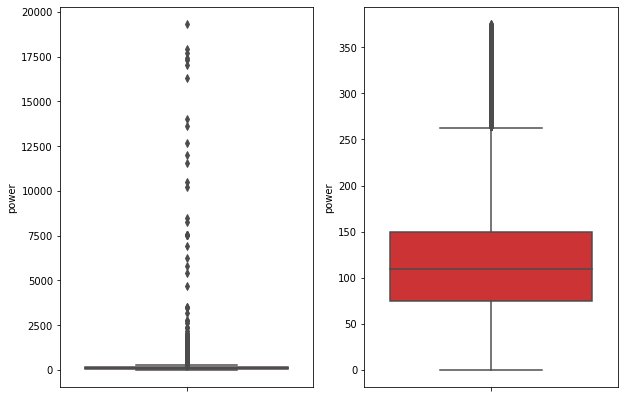

In [18]:
train_data = outliers_proc(train_data,'power',scale = 3)

In [33]:
#合并数据用以构造特征
data = pd.concat([train_data,test_data],axis=0,ignore_index=True)
data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [34]:
#对日期进行处理，data['creatDate'] - data['regDate']，反映汽车使用时间，一般来说价格与使用时间成反比
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days
data['used_time'].isnull().sum()

15072

In [35]:
#构建新的统计量
train_gb = train_data.groupby("brand")
all_info = {}
for kind, kind_data in train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})
data = data.merge(brand_fe, how='left', on='brand')
data_copy = data.copy()

In [36]:
#数据分桶
# 1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
# 2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
# 3. LR 属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线性，能够提升模型的表达能力，加大拟合；
# 4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了表达能力；
# 5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化

# 当然还有很多原因，LightGBM 在改进 XGBoost 时就增加了数据分桶，增强了模型的泛化性

bin = [i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)
data[['power_bin', 'power']].head()


,power_bin,power
0,5.0,60
1,NaN,0
2,16.0,163
3,19.0,193
4,6.0,68


In [37]:
# 删除不需要的数据
data = data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)
print(data.shape)
print(data.columns)
#导出树模型数据
data.to_csv('data_for_tree.csv', index=0)

(199037, 35)
Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'price', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'used_time', 'brand_amount', 'brand_price_max',
       'brand_price_median', 'brand_price_min', 'brand_price_sum',
       'brand_price_std', 'brand_price_average', 'power_bin'],
      dtype='object')


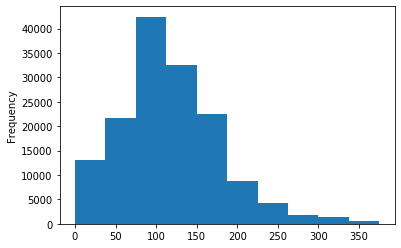

In [38]:
train_data['power'].plot.hist()

## 数据二：OneCode处理

In [39]:
#对特征进行log计算以及归一化处理
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data['power'] = np.log(data['power'] + 1) 
data['power'] = ((data['power'] - np.min(data['power'])) / (np.max(data['power']) - np.min(data['power'])))

data['kilometer'] = ((data['kilometer'] - np.min(data['kilometer'])) / 
                        (np.max(data['kilometer']) - np.min(data['kilometer'])))

def max_min(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

data['brand_amount'] = ((data['brand_amount'] - np.min(data['brand_amount'])) / 
                        (np.max(data['brand_amount']) - np.min(data['brand_amount'])))
data['brand_price_average'] = ((data['brand_price_average'] - np.min(data['brand_price_average'])) / 
                               (np.max(data['brand_price_average']) - np.min(data['brand_price_average'])))
data['brand_price_max'] = ((data['brand_price_max'] - np.min(data['brand_price_max'])) / 
                           (np.max(data['brand_price_max']) - np.min(data['brand_price_max'])))
data['brand_price_median'] = ((data['brand_price_median'] - np.min(data['brand_price_median'])) /
                              (np.max(data['brand_price_median']) - np.min(data['brand_price_median'])))
data['brand_price_min'] = ((data['brand_price_min'] - np.min(data['brand_price_min'])) / 
                           (np.max(data['brand_price_min']) - np.min(data['brand_price_min'])))
data['brand_price_std'] = ((data['brand_price_std'] - np.min(data['brand_price_std'])) / 
                           (np.max(data['brand_price_std']) - np.min(data['brand_price_std'])))
data['brand_price_sum'] = ((data['brand_price_sum'] - np.min(data['brand_price_sum'])) / 
                           (np.max(data['brand_price_sum']) - np.min(data['brand_price_sum'])))

In [40]:
# 对类别特征进行 OneEncoder
data = pd.get_dummies(data, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage', 'power_bin'])
print(data.shape)
data.columns

(199037, 365)


Index(['SaleID', 'name', 'power', 'kilometer', 'price', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4',
       ...
       'power_bin_20.0', 'power_bin_21.0', 'power_bin_22.0', 'power_bin_23.0',
       'power_bin_24.0', 'power_bin_25.0', 'power_bin_26.0', 'power_bin_27.0',
       'power_bin_28.0', 'power_bin_29.0'],
      dtype='object', length=365)

In [41]:
# LR用数据
data.to_csv('data_for_lr.csv', index=0)

## 数据三：自动化特征构造＋PCA降维

In [90]:
data_copy.shape

(199037, 37)

Populating the interactive namespace from numpy and matplotlib


C:\Users\VincentZhou\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


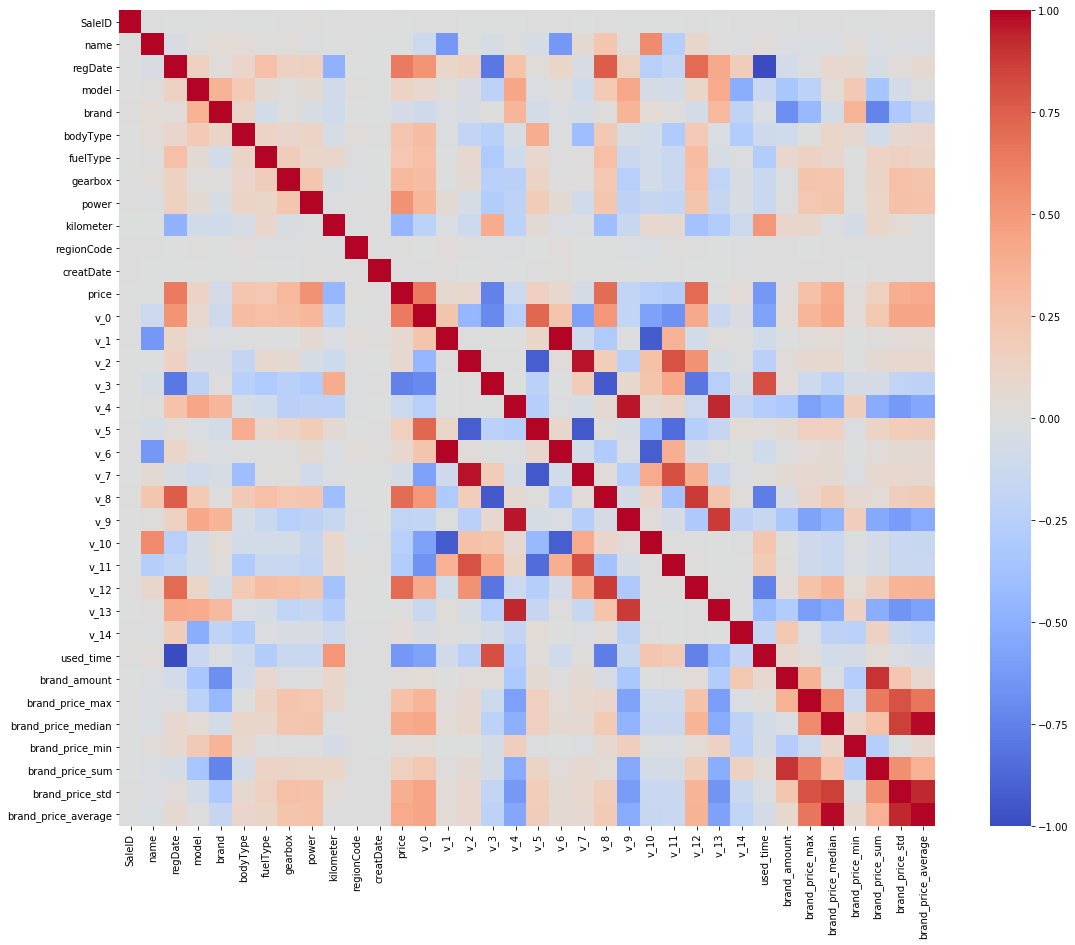

In [49]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)
corrmatrix = data_copy.corr()
sns.heatmap(corrmatrix,square=True,vmax=1,vmin=-1,center=0.0,cmap='coolwarm')


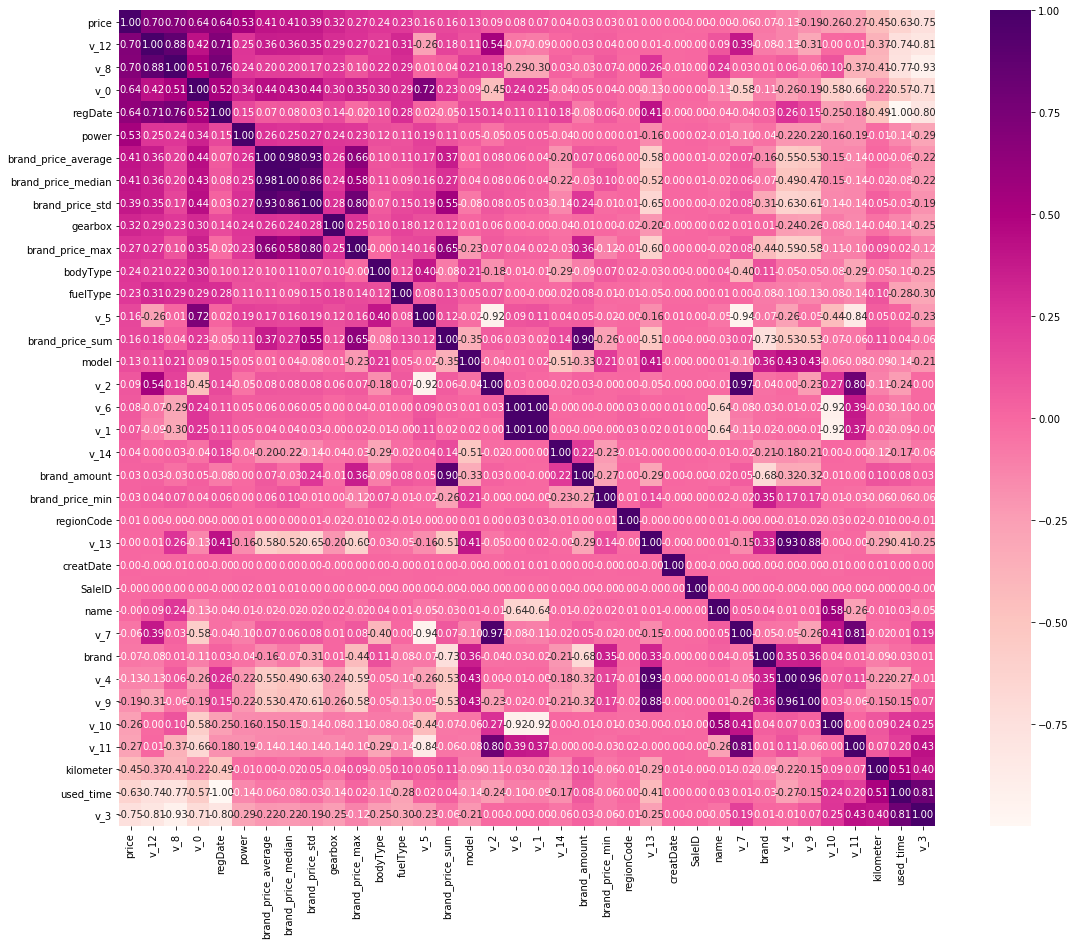

In [51]:
cols = corrmatrix.nlargest(40,'price')['price'].index
cm1 = data_copy[cols].corr()
hm2 = sns.heatmap(cm1,square=True,annot=True,cmap='RdPu',fmt='.2f',annot_kws={'size':10})

In [92]:
tmp_train = data_copy
tmp_price = tmp_train.price
tmp_train = tmp_train.drop(['v_13','creatDate','name','price'], axis=1)
tmp_train.fillna(0,inplace = True)
tmp_train.isnull().sum()


SaleID                 0
regDate                0
model                  0
brand                  0
bodyType               0
fuelType               0
gearbox                0
power                  0
kilometer              0
notRepairedDamage      0
regionCode             0
v_0                    0
v_1                    0
v_2                    0
v_3                    0
v_4                    0
v_5                    0
v_6                    0
v_7                    0
v_8                    0
v_9                    0
v_10                   0
v_11                   0
v_12                   0
v_14                   0
used_time              0
brand_amount           0
brand_price_max        0
brand_price_median     0
brand_price_min        0
brand_price_sum        0
brand_price_std        0
brand_price_average    0
dtype: int64

In [93]:
# creating and entity set 'es'
es = ft.EntitySet(id = 'SaleID')

# adding a dataframe 
es.entity_from_dataframe(entity_id = 'Used_Car', dataframe = tmp_train,
                         index = 'index')

print(es)


2020-03-18 11:53:25,218 featuretools.entityset - WARNING    index index not found in dataframe, creating new integer column
Entityset: SaleID
  Entities:
    Used_Car [Rows: 199037, Columns: 34]
  Relationships:
    No relationships


In [94]:
feature_matrix, feature_names = ft.dfs(entityset=es,
                                      target_entity='Used_Car',
                                       trans_primitives = ['multiply_numeric'])


In [95]:
len(feature_matrix.columns)

529

In [96]:
feature_matrix.shape

(199037, 529)

In [97]:
feature_matrix.to_csv('feature_matrix.csv', index=0)

In [65]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [98]:
#通过整理数据格式和类型减少内存占用
sample_feature = reduce_mem_usage(pd.read_csv('data_for_tree.csv'))
sample_feature.to_csv('data_for_tree_reduce.csv')


Memory usage of dataframe is 55730488.00 MB
Memory usage after optimization is: 15724051.00 MB
Decreased by 71.8%


In [67]:
continuous_feature_names = [x for x in sample_feature.columns if x not in ['price','brand','model','brand']]

In [99]:
sample_feature1 = reduce_mem_usage(feature_matrix)
sample_feature1.to_csv('teature_matrix_reduce.csv')

Memory usage of dataframe is 843916880.00 MB
Memory usage after optimization is: 301740196.00 MB
Decreased by 64.2%


In [102]:
sample_feature1['price']=tmp_price

In [103]:
from sklearn.decomposition import PCA   
y_sample = sample_feature1['price']
x_sample = sample_feature1.drop(['price'], axis=1)

pca = PCA(n_components=20)
reduced_x = pca.fit_transform(x_sample)


In [104]:
reduced_x = pd.DataFrame(reduced_x)
reduced_x['price'] = y_sample
reduced_x.to_csv('PCA_data.csv')

In [106]:
reduced_x[reduced_x['price'].isnull()].shape

(50000, 21)

In [5]:
data_lr = pd.read_csv('data_for_lr.csv')
data_tree = pd.read_csv('data_for_tree_reduce.csv')
data_pca = pd.read_csv('PCA_data.csv')


In [6]:
data_lr.head()

,SaleID,name,power,kilometer,price,v_0,v_1,v_2,v_3,v_4,...,power_bin_20.0,power_bin_21.0,power_bin_22.0,power_bin_23.0,power_bin_24.0,power_bin_25.0,power_bin_26.0,power_bin_27.0,power_bin_28.0,power_bin_29.0
0,0,736,0.415091,0.827586,1850.0,43.357796,3.966344,0.050257,2.159744,1.143786,...,0,0,0,0,0,0,0,0,0,0
1,1,2262,0.000000,1.000000,3600.0,45.305273,5.236112,0.137925,1.380657,-1.422165,...,0,0,0,0,0,0,0,0,0,0
2,2,14874,0.514954,0.827586,6222.0,45.978359,4.823792,1.319524,-0.998467,-0.996911,...,0,0,0,0,0,0,0,0,0,0
3,3,71865,0.531917,1.000000,2400.0,45.687478,4.492574,-0.050616,0.883600,-2.228079,...,0,0,0,0,0,0,0,0,0,0
4,4,111080,0.427535,0.310345,5200.0,44.383511,2.031433,0.572169,-1.571239,2.246088,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data_tree.head()

,Unnamed: 0,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_14,used_time,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,0,736,30.0,6,1.0,0.0,0.0,60,12.5,...,0.9146,4384.0,10190.0,35990.0,1800.0,13.0,36457520.0,4564.0,3576.0,5.0
1,1,1,2262,40.0,1,2.0,0.0,0.0,0,15.0,...,0.2455,4756.0,13656.0,84000.0,6400.0,15.0,124044600.0,8990.0,9080.0,NaN
2,2,2,14874,115.0,15,1.0,0.0,0.0,163,12.5,...,-0.2300,4384.0,1458.0,45000.0,8500.0,100.0,14373814.0,5424.0,9850.0,16.0
3,3,3,71865,109.0,10,0.0,0.0,1.0,193,15.0,...,-0.4788,7124.0,13990.0,92900.0,5200.0,15.0,113034210.0,8250.0,8076.0,19.0
4,4,4,111080,110.0,5,1.0,0.0,0.0,68,5.0,...,1.9240,1531.0,4664.0,31500.0,2300.0,20.0,15414322.0,3344.0,3306.0,6.0


In [8]:
data_pca.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,price
0,0,-9.766481e+14,3.915049e+12,-1.088331e+12,-1.440046e+12,5.550636e+11,2.873506e+10,-5.800615e+10,-6.489879e+10,-4.905665e+10,...,1.715125e+10,-2.219499e+10,9.221036e+07,-9.958361e+09,2.199380e+08,1.314955e+09,7.363887e+08,9.345894e+08,-3.689699e+08,1850.0
1,1,7.773810e+14,1.256454e+13,1.332676e+12,-1.339457e+11,8.218855e+11,9.963163e+10,7.409161e+10,2.232889e+11,2.002995e+11,...,-1.044157e+10,3.070052e+09,-1.864208e+10,-3.529700e+09,-7.907446e+08,9.299260e+08,6.627677e+08,2.137879e+08,-1.906642e+08,3600.0
2,2,-1.419208e+15,1.730690e+12,-1.031676e+11,-1.769292e+12,-1.545727e+11,-1.240259e+10,1.775275e+10,7.527809e+09,1.809240e+11,...,9.325805e+09,3.456200e+09,3.185883e+09,3.730046e+09,-5.939783e+10,-4.817513e+08,-4.806257e+09,1.836206e+09,9.179670e+08,6222.0
3,3,5.490008e+14,1.143665e+13,2.148816e+12,-3.052802e+11,1.656244e+11,3.321412e+11,1.173471e+11,-2.537258e+11,-6.609621e+10,...,4.206633e+10,-7.614308e+09,4.322801e+09,1.399614e+10,1.145363e+09,-8.358131e+09,-6.722041e+08,-3.888981e+08,-3.124828e+08,2400.0
4,4,-1.397128e+15,1.839953e+12,-4.086708e+11,-1.753122e+12,-6.138071e+10,-2.985936e+10,-2.185907e+11,8.318495e+10,1.417175e+10,...,-3.829527e+10,7.599668e+10,-4.694005e+08,2.353801e+09,-3.655082e+09,-8.602504e+08,-5.779110e+08,-1.655200e+09,5.625278e+07,5200.0


# 模型训练

## 数据一

In [76]:
#统一整理缺失值

feature_cols = [col for col in data_tree.columns if col not in ['SaleID','name','regDate','price']]

Train_data = data_tree[~data_tree['price'].isnull()]
Test_data = data_tree[data_tree['price'].isnull()]
X_data = Train_data[feature_cols]
y_data = Train_data['price']

X_test = Test_data[feature_cols]

X_data = X_data.iloc[:,1:]
#y_data = y_data.iloc[:,1:]
X_test = X_test.iloc[:,1:]

print(X_data.shape)
print(y_data.shape)
print(X_test.shape)
cols_x = X_data.columns
X_data.isnull().sum()


(149037, 32)
(149037,)
(50000, 32)


model                      1
brand                      0
bodyType                4494
fuelType                8632
gearbox                 5954
power                      0
kilometer                  0
notRepairedDamage      24220
v_0                        0
v_1                        0
v_2                        0
v_3                        0
v_4                        0
v_5                        0
v_6                        0
v_7                        0
v_8                        0
v_9                        0
v_10                       0
v_11                       0
v_12                       0
v_13                       0
v_14                       0
used_time              11318
brand_amount               0
brand_price_max            0
brand_price_median         0
brand_price_min            0
brand_price_sum            0
brand_price_std            0
brand_price_average        0
power_bin              14771
dtype: int64

In [77]:
#处理一下空值，因为GBDT不允许空值存在
from sklearn.impute import SimpleImputer

X_data = SimpleImputer().fit_transform(X_data)
X_data = pd.DataFrame(X_data,columns = cols_x )

In [64]:
#处理一下空值，因为GBDT不允许空值存在
X_data.model.fillna(X_data.model.mean(),inplace = True)
X_data.bodyType.fillna(0,inplace = True)
X_data.fuelType.fillna(0,inplace = True)
X_data.gearbox.fillna(0,inplace = True)
X_data.notRepairedDamage.fillna(0,inplace = True)
X_data.used_time.fillna(X_data.used_time.mean(),inplace = True)
X_data.power_bin.fillna(X_data.power_bin.mean(),inplace = True)


In [78]:
X_data.isnull().sum()

model                  0
brand                  0
bodyType               0
fuelType               0
gearbox                0
power                  0
kilometer              0
notRepairedDamage      0
v_0                    0
v_1                    0
v_2                    0
v_3                    0
v_4                    0
v_5                    0
v_6                    0
v_7                    0
v_8                    0
v_9                    0
v_10                   0
v_11                   0
v_12                   0
v_13                   0
v_14                   0
used_time              0
brand_amount           0
brand_price_max        0
brand_price_median     0
brand_price_min        0
brand_price_sum        0
brand_price_std        0
brand_price_average    0
power_bin              0
dtype: int64

In [81]:
X_data.describe()

,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,v_0,v_1,...,v_14,used_time,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average,power_bin
count,149037.000000,149037.000000,149037.000000,149037.000000,149037.000000,149037.000000,149037.000000,149037.000000,149037.000000,149037.000000,...,149037.000000,149037.000000,149037.000000,149037.000000,149037.000000,149037.000000,1.490370e+05,149037.000000,149037.000000,149037.000000
mean,46.969712,8.028973,1.785503,0.377380,0.221564,114.615686,12.611959,0.114223,44.386271,-0.040912,...,-0.000010,4439.961821,14419.401914,63188.285399,3757.529701,25.184263,8.525366e+07,5959.189570,5758.685813,11.620299
std,49.347502,7.845709,1.727485,0.532274,0.406920,64.189762,3.909222,0.291092,2.445368,3.639596,...,1.034683,1876.576854,10278.207017,25343.241669,2395.751280,52.881578,6.503061e+07,2271.515235,2883.814751,4.855945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,30.450000,-4.297000,...,-6.547000,88.000000,9.000000,2900.000000,950.000000,11.000000,3.948000e+04,554.000000,1016.500000,0.000000
25%,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,0.000000,43.120000,-3.191000,...,-0.435000,3096.000000,4664.000000,38900.000000,1800.000000,13.000000,1.595423e+07,3640.000000,3576.000000,8.000000
50%,30.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,0.000000,44.600000,-3.050000,...,0.140500,4439.961821,13990.000000,68500.000000,3200.000000,13.000000,1.130342e+08,6260.000000,5530.000000,11.620299
75%,66.000000,13.000000,3.000000,1.000000,0.221564,150.000000,15.000000,0.114223,45.970000,4.000000,...,0.678000,5820.000000,16580.000000,84000.000000,5200.000000,20.000000,1.382791e+08,8090.000000,8076.000000,14.000000
max,247.000000,39.000000,7.000000,6.000000,1.000000,375.000000,15.000000,1.000000,52.300000,7.320000,...,8.660000,9224.000000,31420.000000,99999.000000,27460.000000,980.000000,1.737197e+08,19860.000000,32370.000000,29.000000


### LGB GridSearchCV调参

In [ ]:
from sklearn.model_selection import GridSearchCV

## LGB的参数集合：

objective = ['regression', 'regression_l1', 'mape', 'huber', 'fair']

num_leaves = [3,5,10,15,20,40, 55]
max_depth = [3,5,10,15,20,40, 55]
bagging_fraction = []
feature_fraction = []
drop_rate = []

parameters = {'objective': objective , 'num_leaves': num_leaves, 'max_depth': max_depth}
model = LGBMRegressor()
clf = GridSearchCV(model, parameters, cv=5)
clf = clf.fit(X_data,y_data )

clf.best_params_

In [20]:
def build_model_lr(x_train,y_train):
    reg_model = linear_model.LinearRegression()
    reg_model.fit(x_train,y_train)
    return reg_model

def build_model_ridge(x_train,y_train):
    reg_model = linear_model.Ridge(alpha=0.8)#alphas=range(1,100,5)
    reg_model.fit(x_train,y_train)
    return reg_model

def build_model_lasso(x_train,y_train):
    reg_model = linear_model.LassoCV()
    reg_model.fit(x_train,y_train)
    return reg_model

def build_model_gbdt(x_train,y_train):
    estimator =GradientBoostingRegressor(loss='ls',subsample= 0.85,max_depth= 5,n_estimators = 100)
    param_grid = { 
            'learning_rate': [0.05,0.08,0.1,0.2],
            }
    gbdt = GridSearchCV(estimator, param_grid,cv=3)
    gbdt.fit(x_train,y_train)
    print(gbdt.best_params_)
    # print(gbdt.best_estimator_ )
    return gbdt

def build_model_xgb(x_train,y_train):
    model = xgb.XGBRegressor(n_estimators=120, learning_rate=0.08, gamma=0, subsample=0.8,\
        colsample_bytree=0.9, max_depth=5) #, objective ='reg:squarederror'
    model.fit(x_train, y_train)
    return model

def build_model_lgb(x_train,y_train):
    estimator = lgb.LGBMRegressor(num_leaves=63,n_estimators = 100)
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1],
    }
    gbm = GridSearchCV(estimator, param_grid)
    gbm.fit(x_train, y_train)
    return gbm


In [84]:
## Split data with val
x_train,x_val,y_train,y_val = train_test_split(X_data,y_data,test_size=0.3)

In [87]:
print('predict XGB...')
model_xgb = build_model_xgb(x_train,y_train)
val_xgb = model_xgb.predict(x_val)
subA_xgb = model_xgb.predict(X_test)

print('predict lgb...')
model_lgb = build_model_lgb(x_train,y_train)
val_lgb = model_lgb.predict(x_val)
subA_lgb = model_lgb.predict(X_test)

#print('Predict GBDT...')
#model_gbdt = build_model_gbdt(x_train,y_train)
#val_gbdt = model_gbdt.predict(x_val)
#subA_gbdt = model_gbdt.predict(X_test)

predict XGB...
predict lgb...


In [92]:
def Sta_inf(data):
    print('_min',np.min(data))
    print('_max:',np.max(data))
    print('_mean',np.mean(data))
    print('_ptp',np.ptp(data))
    print('_std',np.std(data))
    print('_var',np.var(data))
    
print('Sta inf of lgb:')
Sta_inf(subA_lgb)

Sta inf of lgb:
_min -2180.704261195222
_max: 86052.9662502034
_mean 5853.8063148707
_ptp 88233.67051139862
_std 7321.191216712993
_var 53599840.83167547


### Starking 融合

In [96]:
## Starking

## 第一层
train_lgb_pred = model_lgb.predict(x_train)
train_xgb_pred = model_xgb.predict(x_train)

Strak_X_train = pd.DataFrame()
Strak_X_train['Method_1'] = train_lgb_pred
Strak_X_train['Method_2'] = train_xgb_pred

Strak_X_val = pd.DataFrame()
Strak_X_val['Method_1'] = val_lgb
Strak_X_val['Method_2'] = val_xgb

Strak_X_test = pd.DataFrame()
Strak_X_test['Method_1'] = subA_lgb
Strak_X_test['Method_2'] = subA_xgb

## level2-method 
model_lr_Stacking = build_model_lr(Strak_X_train,y_train)
## 训练集
train_pre_Stacking = model_lr_Stacking.predict(Strak_X_train)
print('MAE of Stacking-LR:',mean_absolute_error(y_train,train_pre_Stacking))

## 验证集
val_pre_Stacking = model_lr_Stacking.predict(Strak_X_val)
print('MAE of Stacking-LR:',mean_absolute_error(y_val,val_pre_Stacking))

## 预测集
print('Predict Stacking-LR...')
subA_Stacking = model_lr_Stacking.predict(Strak_X_test)

subA_Stacking[subA_Stacking<10]=10  ## 去除过小的预测值

sub = pd.DataFrame()
sub['SaleID'] = test_data.SaleID
sub['price'] = subA_Stacking
sub.to_csv('sub_Stacking.csv',index=False)

MAE of Stacking-LR: 556.1931215684397
MAE of Stacking-LR: 639.9982076735741
Predict Stacking-LR...


In [97]:
def Sta_inf(data):
    print('_min',np.min(data))
    print('_max:',np.max(data))
    print('_mean',np.mean(data))
    print('_ptp',np.ptp(data))
    print('_std',np.std(data))
    print('_var',np.var(data))

print('Sta inf:')
Sta_inf(subA_Stacking)

Sta inf:
_min 10.0
_max: 86610.99719952692
_mean 5875.32619659023
_ptp 86600.99719952692
_std 7336.352906875654
_var 53822073.97422286


## 数据三

In [101]:
data_pca.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,price
0,0,-9.766481e+14,3.915049e+12,-1.088331e+12,-1.440046e+12,5.550636e+11,2.873506e+10,-5.800615e+10,-6.489879e+10,-4.905665e+10,...,1.715125e+10,-2.219499e+10,9.221036e+07,-9.958361e+09,2.199380e+08,1.314955e+09,7.363887e+08,9.345894e+08,-3.689699e+08,1850.0
1,1,7.773810e+14,1.256454e+13,1.332676e+12,-1.339457e+11,8.218855e+11,9.963163e+10,7.409161e+10,2.232889e+11,2.002995e+11,...,-1.044157e+10,3.070052e+09,-1.864208e+10,-3.529700e+09,-7.907446e+08,9.299260e+08,6.627677e+08,2.137879e+08,-1.906642e+08,3600.0
2,2,-1.419208e+15,1.730690e+12,-1.031676e+11,-1.769292e+12,-1.545727e+11,-1.240259e+10,1.775275e+10,7.527809e+09,1.809240e+11,...,9.325805e+09,3.456200e+09,3.185883e+09,3.730046e+09,-5.939783e+10,-4.817513e+08,-4.806257e+09,1.836206e+09,9.179670e+08,6222.0
3,3,5.490008e+14,1.143665e+13,2.148816e+12,-3.052802e+11,1.656244e+11,3.321412e+11,1.173471e+11,-2.537258e+11,-6.609621e+10,...,4.206633e+10,-7.614308e+09,4.322801e+09,1.399614e+10,1.145363e+09,-8.358131e+09,-6.722041e+08,-3.888981e+08,-3.124828e+08,2400.0
4,4,-1.397128e+15,1.839953e+12,-4.086708e+11,-1.753122e+12,-6.138071e+10,-2.985936e+10,-2.185907e+11,8.318495e+10,1.417175e+10,...,-3.829527e+10,7.599668e+10,-4.694005e+08,2.353801e+09,-3.655082e+09,-8.602504e+08,-5.779110e+08,-1.655200e+09,5.625278e+07,5200.0


In [104]:

Train_data = data_pca[~data_pca['price'].isnull()]
Test_data = data_pca[data_pca['price'].isnull()]
X_data = Train_data.iloc[:,:-1]
y_data = Train_data['price']

X_test = Test_data.iloc[:,:-1]

X_data = X_data.iloc[:,1:]
#y_data = y_data.iloc[:,1:]
X_test = X_test.iloc[:,1:]

print(X_data.shape)
print(y_data.shape)
print(X_test.shape)
cols_x = X_data.columns

(149037, 20)
(149037,)
(50000, 20)


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64

In [107]:
## Split data with val
x_train,x_val,y_train,y_val = train_test_split(X_data,y_data,test_size=0.3)

print('predict XGB...')
model_xgb = build_model_xgb(x_train,y_train)
val_xgb = model_xgb.predict(x_val)
subA_xgb = model_xgb.predict(X_test)

print('predict lgb...')
model_lgb = build_model_lgb(x_train,y_train)
val_lgb = model_lgb.predict(x_val)
subA_lgb = model_lgb.predict(X_test)

#print('Predict GBDT...')
#model_gbdt = build_model_gbdt(x_train,y_train)
#val_gbdt = model_gbdt.predict(x_val)
#subA_gbdt = model_gbdt.predict(X_test)

predict XGB...
predict lgb...


In [108]:
## Starking

## 第一层
train_lgb_pred = model_lgb.predict(x_train)
train_xgb_pred = model_xgb.predict(x_train)

Strak_X_train = pd.DataFrame()
Strak_X_train['Method_1'] = train_lgb_pred
Strak_X_train['Method_2'] = train_xgb_pred

Strak_X_val = pd.DataFrame()
Strak_X_val['Method_1'] = val_lgb
Strak_X_val['Method_2'] = val_xgb

Strak_X_test = pd.DataFrame()
Strak_X_test['Method_1'] = subA_lgb
Strak_X_test['Method_2'] = subA_xgb

## level2-method 
model_lr_Stacking = build_model_lr(Strak_X_train,y_train)
## 训练集
train_pre_Stacking = model_lr_Stacking.predict(Strak_X_train)
print('MAE of Stacking-LR:',mean_absolute_error(y_train,train_pre_Stacking))

## 验证集
val_pre_Stacking = model_lr_Stacking.predict(Strak_X_val)
print('MAE of Stacking-LR:',mean_absolute_error(y_val,val_pre_Stacking))

## 预测集
print('Predict Stacking-LR...')
subA_Stacking = model_lr_Stacking.predict(Strak_X_test)

subA_Stacking[subA_Stacking<10]=10  ## 去除过小的预测值

sub = pd.DataFrame()
sub['SaleID'] = test_data.SaleID
sub['price'] = subA_Stacking
sub.to_csv('sub_Stacking_pca.csv',index=False)

MAE of Stacking-LR: 1376.7921789785394
MAE of Stacking-LR: 1482.4074470963133
Predict Stacking-LR...


## 神经网络

In [54]:
scaler = StandardScaler()
scaler.fit(X_train)  # Fit only to the training data
scaled_X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [88]:
nn = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,5), random_state=1)
nn.fit(scaled_X_train,y_train.astype('int'))
y_predict_train = nn.predict(scaled_X_train)

from sklearn.metrics import mean_squared_error
mse_1 = mean_squared_error(y_predict_train,y_train)
print("Train ERROR = ", mse_1)

Train ERROR =  2572959.2049500975


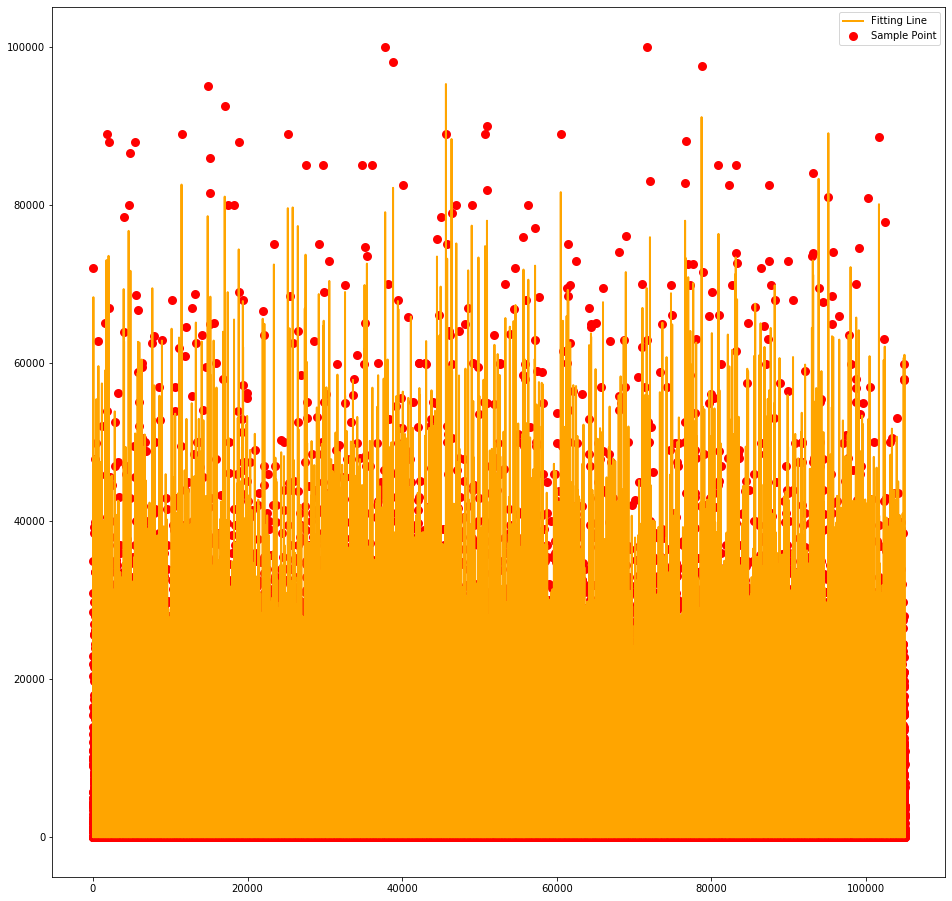

In [89]:
import matplotlib.pyplot as plt
ax=range(0,len(y_train))
plt.figure(figsize=(16,16))
plt.scatter(ax,y_train,color="red",label="Sample Point",linewidth=3) 
plt.plot(ax,y_predict_train,color="orange",label="Fitting Line",linewidth=2)
plt.legend()
plt.show()


# Test Prediction

In [95]:
y_pred_test = nn.predict(scaled_X_test)
mse_2 = mean_squared_error(y_pred_test,y_test)
print ("Test ERROR = ", mse_2)


Test ERROR =  2515909.060139041


In [94]:
scaled_X_test

,v_12,regDate,v_0,v_2,creatDate,model,v_5,bodyType,v_14,v_1,SaleID,name,v_13,fuelType
135268,0.414900,1.610914,0.358148,1.239958,0.321961,2.313234,-0.200524,-0.161914,-0.864128,0.970620,1.389839,-0.936649,2.091661,-0.085322
9395,-0.256894,-0.055461,0.290651,-0.192729,0.321959,0.035369,0.129759,0.023201,-0.260755,-0.912580,-1.518322,1.507863,-1.364484,-0.085322
24474,0.689096,0.871040,0.318798,0.010732,0.321961,-0.811272,-0.008807,0.023201,0.518734,-0.859694,-1.169938,1.086256,1.268769,-0.085322
131204,-0.778329,-1.378871,0.312040,-0.252777,0.321962,-0.690323,0.199944,-0.347030,-0.404686,0.805877,1.295944,-0.409931,-1.665320,-0.085322
87258,0.633614,1.239952,0.445445,0.335148,0.321959,-0.166212,-0.006481,0.208317,0.986076,0.711127,0.280619,-0.405541,1.828687,-0.085322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134236,-1.309229,-1.188926,0.226466,-0.755934,0.321975,-0.952378,0.153664,-0.347030,-0.101243,0.712426,1.365995,-0.682044,-1.029462,-0.085322
70516,-1.164205,-1.369700,0.145469,-0.295115,0.321963,-0.367793,-0.064720,-0.161914,0.044499,-0.904162,-0.106187,0.763488,-0.194552,-0.085322
52560,-0.329529,-0.631448,0.279422,-0.576989,0.321961,-0.871746,0.181373,-0.347030,-0.364669,-0.898399,-0.521041,1.082653,-1.403902,0.038004
99213,1.181426,0.488745,0.443549,0.722685,0.321961,0.035369,0.134094,0.023201,0.471898,-0.901582,0.556827,1.747958,-0.934935,-0.023659


# Submission

## Neural Network

In [140]:
data_nn = pd.read_csv('used_car_testA_20200313.csv')
#cols = cols.drop('price')
feature_data_test_nn = data_nn[cols]
#feature_data_test.isnull().sum()

feature_data_test_nn.v_12.fillna(feature_data_test_nn.v_12.mean(),inplace = True)
feature_data_test_nn.v_13.fillna(feature_data_test_nn.v_13.mean(),inplace = True)
feature_data_test_nn.v_14.fillna(feature_data_test_nn.v_14.mean(),inplace = True)

scaler = StandardScaler()
scaler.fit(feature_data_test_nn)  # Fit only to the training data
scaled_X_test_sub_nn = pd.DataFrame(scaler.transform(feature_data_test_nn), index=feature_data_test_nn.index, columns=feature_data_test_nn.columns)

y_pred_test_sub = nn.predict(scaled_X_test_sub_nn)
df_submission_nn = pd.DataFrame(list(zip(feature_data_test_nn.SaleID,y_pred_test_sub)))
df_submission_nn.columns = ('SalesID','MLP')
df_submission_nn



C:\Users\VincentZhou\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,SalesID,MLP
0,150000,37195.704083
1,150001,16.390351
2,150002,6264.386931
3,150003,11579.728408
4,150004,16.390351
...,...,...
49995,199995,3652.457211
49996,199996,2208.915860
49997,199997,7714.679870
49998,199998,9551.169768


## OLS